## True/False Questions (30pts)
For each question, please provide a short explanation to support your judgment or fix the wrong statement

**Problem 1.1 (3pts)** Long short-term memory (LSTM) is able to configure how much the history information to keep. Particularly, the forget gate is designed to control how much of the previous cell state to
retain. we cannot adjust the rest parameters within one LSTM cell to achieve identical effect as changing
the forget gate.

True, while you could theoretically adjust the weights of the input and ouptut gates to minimize or de-weight information you want to 'forget' it would not be possible to achieve the same effect as the forget gate. I had to look this one up since I do not see where a forget gate has been covered in the course material.

**Problem 1.2 (3pts)** In a simple self-attention, the time complexity is O(n
2d) for query, key, and value
(q, k, v) with sequence length n and dimensionality d. For multi-head attention, where the number of
heads is h and the projections WQ, W K, WV ∈ R
d×(d/h)
, the time complexity remains O(n
2d).

False, in simple attention we perform computations at $O(n^2d)$ which is a singular attention over the entire sequence. In multi-head attention, we want multiple attentions for each word which increases the time complexity.

**Problem 1.3 (3pts)** Byte Pair Encoding (BPE) is a "Bottom-up" tokenization technique and is used in GPT
and BERT. Compared to traditional word-level tokenization, it reduces the vocabulary size significantly and
provides better handling of unknown words.

True, BPE is a subword tokenization technique that adds new tokens to the vocabulary by merging the most frequent pairs. This means that rare words can be broken down into subwords which means they wont actually need to be in the vocabulary. 

**Problem 1.4 (3pts)** In transformers, positional embedding is multiplied on the embedding of each token
to represent the position relationship between tokens.

False, positional embeddings are added to the token embeddings to give the model informatio about the position of a token in a sequence. 

**Problem 1.5 (3pts)** In an encoder-decoder transformer model, the information captured by the encoder
is used as the "Query" and "Value" in the second multi-head attention block in the decoder. (Hint: Refer to
Lecture 10 slides).

False, the ouputs of the encoder are used to construct keys and values which are then used as inputs to the decoder.

**Problem 1.6 (3pts)** In LLMs, a token stands for a word in the input prompt or output prompt.

True most of the time although tokens do not have to be complete words and can be partial words or subwords (like in byte pair encoding).

**Problem 1.7 (3pts)** Assume an LLMs input token length is N and generated token length is M and the
hidden dimension is d. In decoding phase the computation complexity for computing Q,K,V in a layer of
a single forward pass is O((N + M)d).


False, the computational complexity at each layer is $O(n^2)$ where n is the number of tokens in the input sequence per Lecture-10 slide 19.

**Problem 1.8 (3pts)** Flash attention is proposed to improve the computation locality of multihead attention computation in LLMs.

True, flash attention uses tiling to reduce the number of memory reads/writes. I had to look up the meaning of 'computation locality' which means to take advantage of the the hierarchical strucutre of memory systems and minimize the time spent waiting for data to be fetched. ALthough it seems like the concept of KV-Cacheing is more closely related to the concept of computational locality improvements.

**Problem 1.9 (3pts)** In RLHF, human directly involve in the training process of LLMs, providing feedback
to the LLM generated contents and train it accordingly

True, this process involves training a model to learn human preference by providing human feedback on generated text.

**Problem 1.10 (3pts)** KV-Cache is not helpful in training large language model.

False, KV-Cache is a technique that optimizes memory requirements for LLM training. This is beneficial when training large language models.

## Lab (1): Recurrent Neural Networks for Sentiment Analysis (35pts)

Google colab is a useful tool for modeling training. In order to run ipynb document, you need to upload
your jupyter notebook document to google drive. Then double click the file in the google drive, which will
lead you to google colab. Moreover, it’d be more efficient to use GPU to train your LSTM and Transformer
models in this assignment. To use GPU, please check Runtime > Change run-time type, and select GPU
as the hardware accelerator. You may click on side bar document icon to upload your dataset and python
file there.

In this lab, you will learn to implement an LSTM model for sentiment analysis. Sentiment analysis
[1, 2] is a classification task to identify the sentiment of language. It usually classifies data into two to
three labels: positive, negative or/and neutral. IMDB [3] is one of the most widely used dataset for binary
sentiment classification. It uses only positive and negative labels. IMDB contains 50,000movie review
data collected from popular movie rating service IMDB. You may find more details at https://www.kaggle.
com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews.

To start this assignment, please open the provided Jupyter Notebook LabRNN.ipynb. We have provided implementation for the training recipe, including optimizers, learning rate schedulers, and weight
initialization. You may NOT change any of the hyperparameter settings (i.e., the object HyperParams) in
this lab.

Grading Instructions. For this part, we mainly grade on the logic and conciseness of the code. If a mistake is found in this part that lead to erroneous conclusions for questions in the later part, we will consider
this and provide partial/full credit for the later part, to avoid applying the same penalty twice. Please
attach your added code in the report under corresponding question. Note that TAs and Professor have
the final discretion to adjust grade according to the given submission.

**(a)** (5 pts) Implement your own data loader function. First, read the data from the dataset file on the
local disk. Then split the dataset into three sets: train, validation, and test by 7 : 1 : 2 ratio. Finally return
x_train, x_valid, x_test, y_train, y_valid and y_test, where x represents reviews and y represent labels.

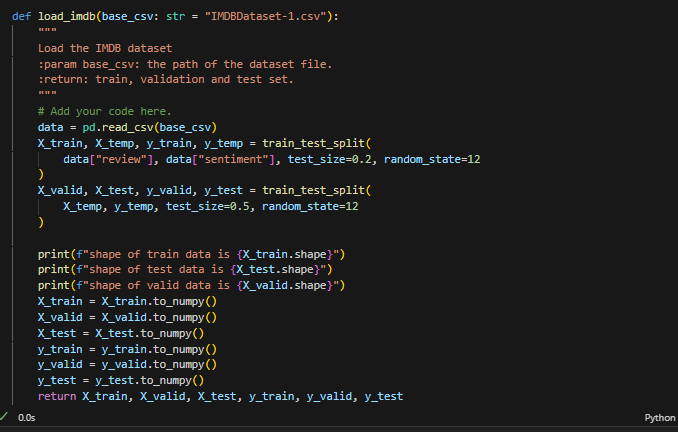

**(b)** (5 pts) Implement the build_vocab function to build a vocabulary based on the training corpus. You
should first compute the frequency of all the words in the training corpus. Remove the words that are in
the STOP_WORDS. Then filter the words by their frequency (≥ min_freq) and finally generate a corpus
variable that contains a list of words.


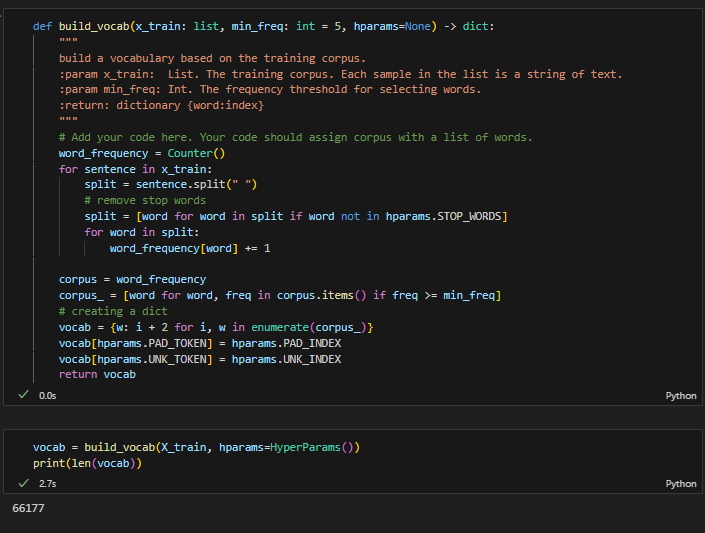

**(c)**  (5 pts) Implement the tokenization function. For each word, find its index in the vocabulary. Return
a list of integers that represents the indices of words in the example.

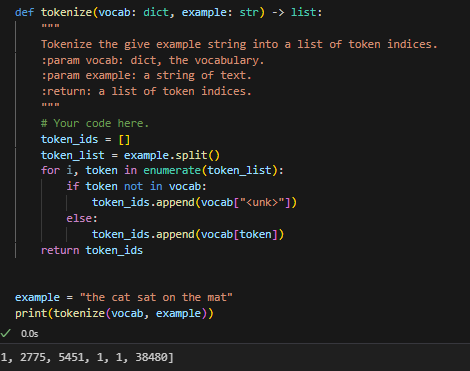

**(d)** (5 pts) Implement the __getitem__ function in the IMDB class. Given an index i, you should return
the i-th review and label. The review is originally a string. Please tokenize it into a sequence of token
indices. Use the max_length parameter to truncate the sequence so that it contains at most max_length
tokens. Convert the label string (‘positive’ / ‘negative’) to a binary index, such as ‘positive’ is 1 and ‘negative’
is 0. Return a dictionary containing three keys: ‘ids’, ‘length’, ‘label’ which represent the list of token ids,
the length of the sequence, the binary label.

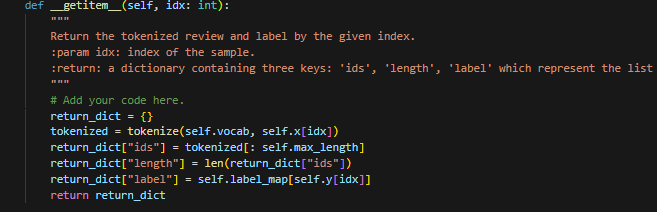

**(e)** (5 pts) In __init__, a LSTM model contains an embedding layer, an lstm cell, a linear layer, and a
dropout layer. You can call functions from Pytorch’s nn library. For example, nn.Embedding, nn.LSTM,
nn.Linear...


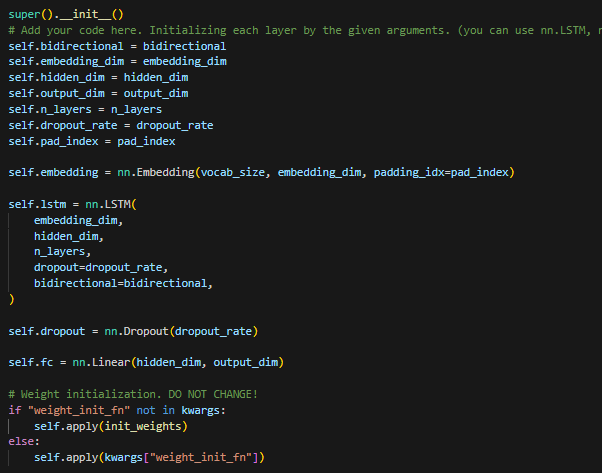


(5 pts) In forward, decide where to apply dropout. The sequences in the batch have different lengths.
Write/call a function to pad the sequences into the same length. Apply a fully-connected (fc) layer to the
output of the LSTM layer. Return the output features which is of size [batch size, output dim].


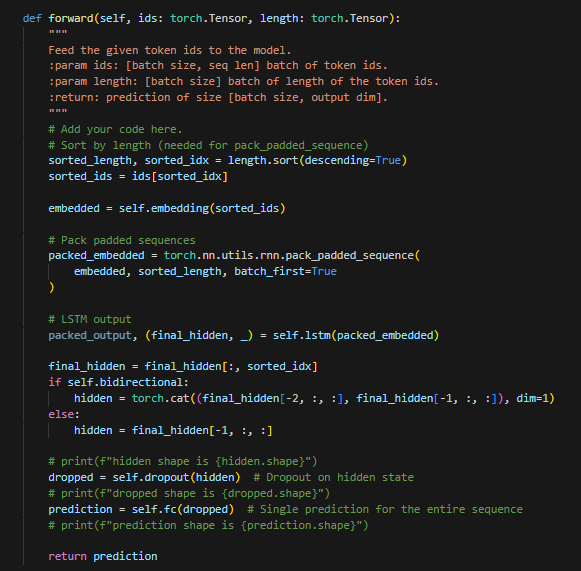

**(f)** (5 pts) Train the LSTM model for 5 epochs with default configuration. Do you observe a steady
and consistent decrease of the loss value as training progresses? Report your observation on the learning
dynamics of training loss, and validation loss on the IMDB dataset. Besides, show the model prediction of
the first test set. Do they meet your expectations and why?

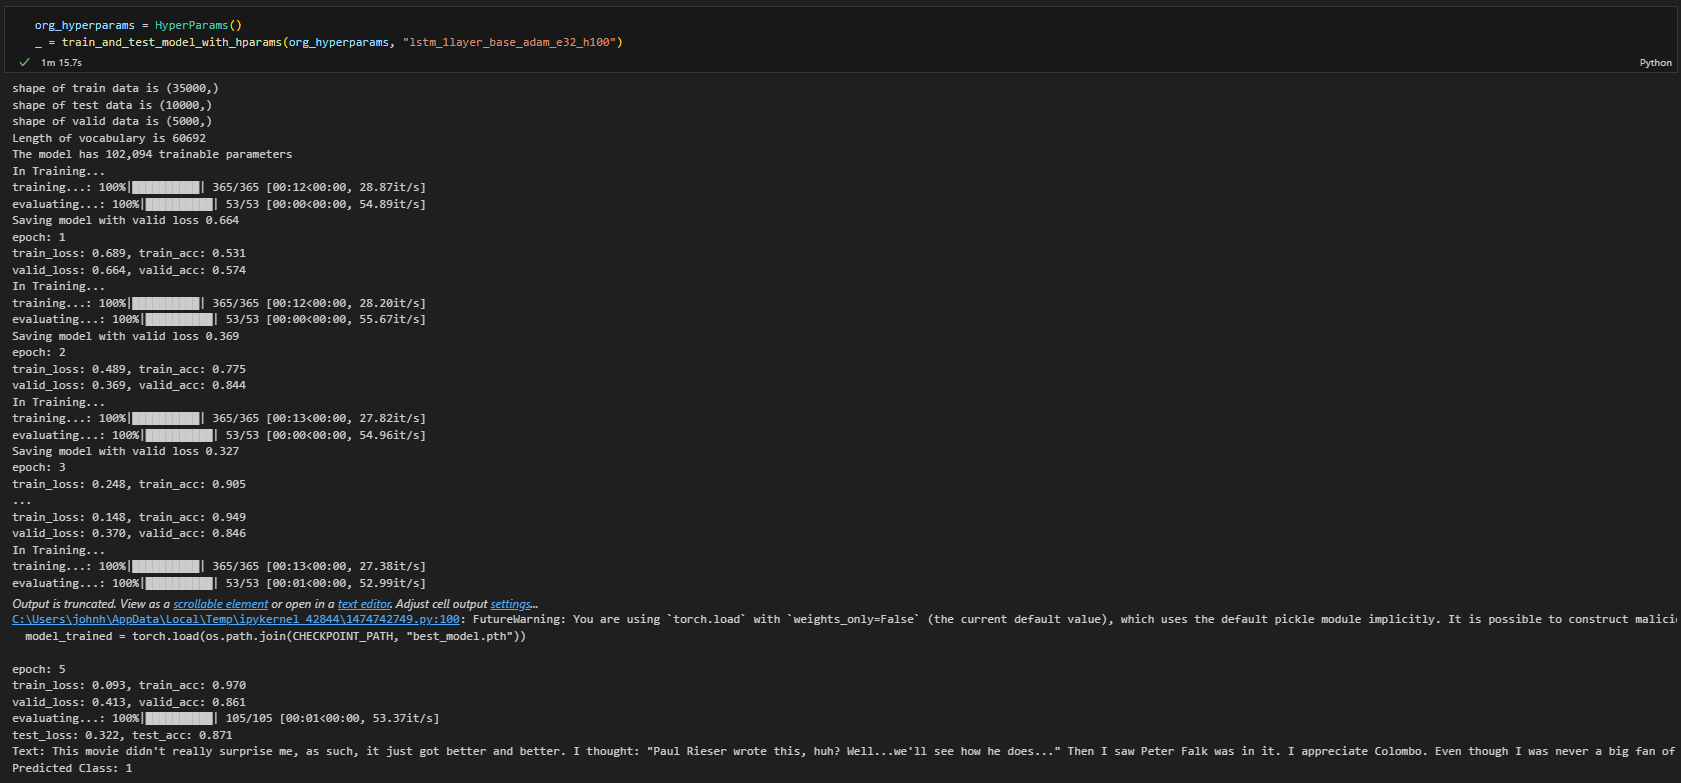

## Lab (2) Large Language Model for Text Generation (45pts)

In this lab, we also recommend you using Google colab to finish the model training. You will learn to use
hugging face transformers to run and fine-tune large language models. Please follow the instruction in
jupyter notebook to finish the task and attach your implemented code in the report under the corresponding question.


**(a)** (10 pts) Load the pre-trained GPT-2 and generate some text. It is recommended to use .generate()
for token generation and .decode to decode token into text.

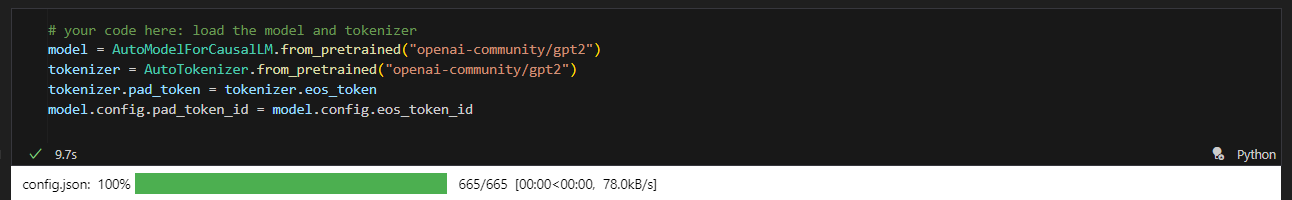

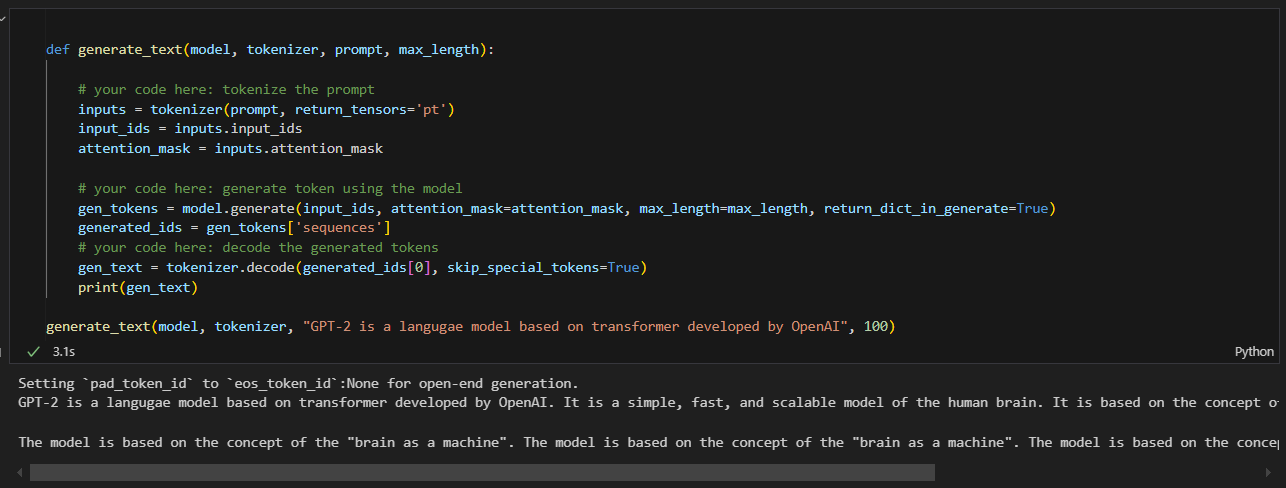

**(b)** (10 pts) Prepare the dataset. We are using wiki-text as test and training dataset, but it is a relative
large dataset, we are only using 10% of data for practice.

**(c)** (10 pts) Implement the inference of GPT-2, and evaluate its performance. We use perplexity as the
evaluation metric, which is a common metric for LLMs.

**(d)** (5 pts) Finetune the GPT-2 model on wiki-text dataset. Show how the train and validation loss
change in different epoch. Hugging face provide convenient function to train a transformers, there is no
need to implement your own training function. After finetuning, load the finetuned model and evaluate
the perplexity and try to generate some text.

**(e)**  (5 pts) Use LoRA to finetune the GPT-2 model. Hugging face peft has implemented LoRA, directly
call the function to realize LoRA finetuning.


**(f)** (5 pts) Compare the finetuning time of fully finetuning and LoRA finetuning, explain the reason.
Besides, compare the perplexity and generated text of Pre-trained GPT-2 and finetuned, LoRA finetuned
GPT-2, explain the reason.